In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
def permutation_sample(data1, data2):
  data = np.concatenate((data1, data2))

  permuted_data = np.random.permutation(data)

  perm_data1 = permuted_data[:len(data1)]
  perm_data2 = permuted_data[len(data1):]

  return perm_data1, perm_data2

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/cschellenberger/Data-Science-Learning/master/frog_tongue.csv", skiprows=14)
df.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


Text(0, 0.5, 'impact force (mN)')

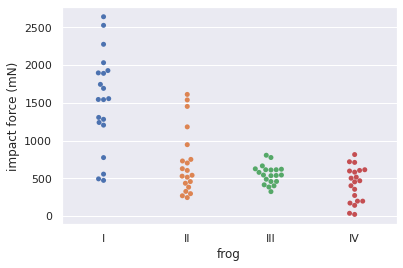

In [ ]:
# swarm plot
sns.swarmplot(x='ID', y='impact force (mN)', data=df)

plt.xlabel('frog')
plt.ylabel('impact force (mN)')

In [ ]:
df[df['ID'] == "IV"]['impact force (mN)']

419.1

In [ ]:
# permutation test
frog_a = df[df['ID'] == "III"]['impact force (mN)']
frog_b = df[df['ID'] == "IV"]['impact force (mN)']

In [ ]:
def diff_of_means(data_1, data_2):
  diff = np.mean(data_1) - np.mean(data_2)

  return diff

In [ ]:
def do_replicate(data_1, data_2, size):
  perm_replicates = np.empty(size)

  for i in range(size):
    perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

    # hitung stat
    perm_replicates[i] = diff_of_means(perm_sample_1, perm_sample_2)

  return perm_replicates

In [ ]:
diff_ori = diff_of_means(frog_a, frog_b)
diff_ori

131.0

In [ ]:
perm_replicates = do_replicate(frog_a, frog_b, size=1000)
np.sum(perm_replicates >= diff_ori)

10

In [ ]:
p_value = np.sum(perm_replicates >= diff_ori) / len(perm_replicates)
p_value

0.01